* Collect and Understand the data

In [3]:
# Reading files 
import pandas as pd
reaction=pd.read_csv(r"D:\career era exams\accenture_task\Reactions.csv")
reaction_types=pd.read_csv(r"D:\career era exams\accenture_task\ReactionTypes.csv")
content=pd.read_csv(r"D:\career era exams\accenture_task\Content.csv")
    

In [5]:
print(reaction_types.shape)
print("No. of duplicates in reaction_types",reaction_types.duplicated().sum())
print(reaction_types.dtypes)
print(reaction_types.isna().sum())
reaction_types.head()

(16, 4)
No. of duplicates in reaction_types 0
Unnamed: 0        int64
Reaction Type    object
Sentiment        object
Score             int64
dtype: object
Unnamed: 0       0
Reaction Type    0
Sentiment        0
Score            0
dtype: int64


,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [6]:
print(content.shape)
print("No.od duplicates in content:",content.duplicated().sum())
print(content.dtypes)
print(content.isna().sum())



(1000, 6)
No.od duplicates in content: 0
Unnamed: 0           int64
Content ID          object
User ID             object
Content Type        object
Content Category    object
URL                 object
dtype: object
Unnamed: 0            0
Content ID            0
User ID               0
Content Type          0
Content Category      0
URL                 199
dtype: int64


# DATA Modeling
* Create a final data set by merging your three tables together

In [7]:

join1=pd.merge(reaction,content,on="Content ID",how="left")
print(join1.shape)
join2=pd.merge(join1,reaction_types,on="Reaction Type",how="left")
print(join2.shape)
join2.head()

(25553, 10)
(25553, 13)


,Unnamed: 0_x,Content ID,User ID_x,Reaction Type,Datetime,Unnamed: 0_y,User ID_y,Content Type,Content Category,URL,Unnamed: 0,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,22-04-2021 15:17,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,NaN,NaN,NaN
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,07-11-2020 09:43,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,2.0,negative,0.0
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,17-06-2021 12:22,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,11.0,negative,10.0
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,18-04-2021 05:13,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,14.0,negative,15.0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,06-01-2021 19:13,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,2.0,negative,0.0


In [8]:
final_df=join2.drop([ 'Unnamed: 0_x', 'User ID_x',
       'Unnamed: 0_y', 'User ID_y', 'URL',
       'Unnamed: 0'],axis=1)

# EDA

# Data Cleaning
1. Finding duplicates and eliminate
2. Find null values 
3. Change data types
4. Distinct values -categorical values

In [11]:
print(" Total Duplicates in final dataset: ",final_df.duplicated().sum())
print("Null values are :",final_df.isna().sum())

final_df.head()


 Total Duplicates in final dataset:  0
Null values are : Content ID            0
Reaction Type       980
Datetime              0
Content Type          0
Content Category      0
Sentiment           980
Score               980
dtype: int64


,Content ID,Reaction Type,Datetime,Content Type,Content Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,22-04-2021 15:17,photo,Studying,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07-11-2020 09:43,photo,Studying,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17-06-2021 12:22,photo,Studying,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18-04-2021 05:13,photo,Studying,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06-01-2021 19:13,photo,Studying,negative,0.0


In [12]:
print("Reaction Types are: ",final_df["Reaction Type"].nunique())    
final_df["Reaction Type"].unique()

Reaction Types are:  16


array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

In [13]:
print("Content Category: " ,final_df["Content Category"].nunique())
final_df["Content Category"].unique()

Content Category:  41


array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [14]:
#final_df["Content Category"] = final_df["Content Category"].str.replace('"', '')
final_df["Content Category"] = final_df["Content Category"].str.replace('"', ' ').str.strip().str.lower()



In [16]:
print("Distinct values of content category:  ", final_df["Content Category"].nunique())
final_df["Content Category"].unique()

Distinct values of content category:   16


array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [24]:
print("The total reactions types for the contents are:",final_df["Reaction Type"].nunique())
print("Reaction types are :","\n",final_df["Reaction Type"].unique())


The total reactions types for the contents are: 16
Reaction types are : 
 ['disgust' 'dislike' 'scared' 'interested' 'peeking' 'cherish' 'hate'
 'love' 'indifferent' 'super love' 'intrigued' 'worried' 'like' 'heart'
 'want' 'adore']


# Data Cleaning/Manipulation
# as client requested removing outliers by dropping them

In [17]:

final_df=final_df.dropna()
print(final_df.isna().sum())

Content ID          0
Reaction Type       0
Datetime            0
Content Type        0
Content Category    0
Sentiment           0
Score               0
dtype: int64


In [27]:
from datetime import date
final_df["Datetime"] =pd.to_datetime (final_df ["Datetime"] )


In [28]:
final_df["Datetime"].dt.year.unique()

array([2020, 2021], dtype=int64)

In [29]:
final_df["Month"]=final_df["Datetime"].dt.month

In [30]:
final_df.head()

,Content ID,Reaction Type,Datetime,Content Type,Content Category,Sentiment,Score,Month
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,photo,studying,negative,0.0,7
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10.0,6
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15.0,4
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,photo,studying,negative,0.0,6
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30.0,8


In [18]:
# cleaned_final_dataset
social_buzz=final_df.to_csv("D:\\career era exams\\accenture_task\\socialBuzz_cleaned_data.csv")

# Insights


# Top 5 categories with the largest popularity
* popularity is quantified by the “Score” given to each reaction type.

In [19]:
final_df.groupby(['Content Category'])['Score'].aggregate(sum).sort_values(ascending = False).head(5)


Content Category
animals           74965.0
science           71168.0
healthy eating    69339.0
technology        68738.0
food              66676.0
Name: Score, dtype: float64

<AxesSubplot:xlabel='Content Category'>

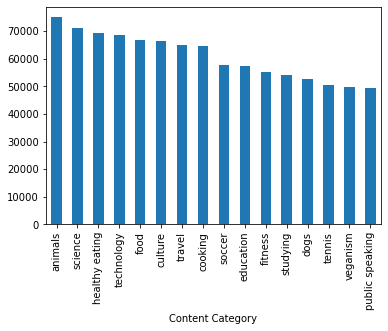

In [20]:
final_df.groupby(['Content Category'])['Score'].sum().sort_values(ascending = False).plot(kind='bar', y='Content Category')

# Among 16 reactions types Travel and Science content categories are highly reacted as 1897 and 1796 respectively.

<AxesSubplot:ylabel='Score'>

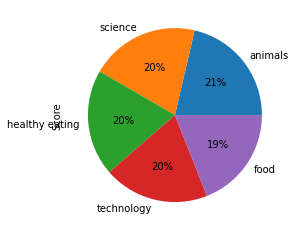

In [23]:
final_df.groupby(['Content Category'])['Score'].sum().sort_values(ascending = False).head(5).plot(kind='pie', y='Content Category',autopct='%1.0f%%')

In [25]:
final_df.groupby(['Content Category'])["Reaction Type"].count().sort_values(ascending = False)

Content Category
animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Reaction Type, dtype: int64

<AxesSubplot:ylabel='Content Category'>

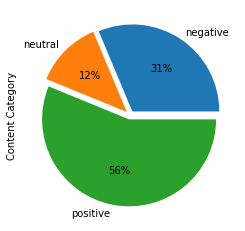

In [26]:
final_df.groupby(["Sentiment"])["Content Category"].count().plot(
    kind='pie', y="Sentiment",
  autopct='%1.0f%%', explode=(0.05, 0.05, 0.05))

In [31]:

final_df.groupby(["Month"])["Content Category"].count().sort_values(ascending = False)



Month
1     2142
7     2116
5     2110
12    2099
10    2087
6     2068
8     2055
11    2055
9     1991
3     1982
4     1978
2     1890
Name: Content Category, dtype: int64

# in this 2 years perioed January Month is the high

# 2nd approach
* Data Manipulation with Majority values



In [39]:
# Found Nulls
print(final_df.isna().sum())

Content ID              0
Reaction Type         980
Datetime                0
Content Type            0
Content Category    24553
Sentiment             980
Score                 980
dtype: int64


In [95]:
print("Majority in Reaction Type:",final_df.groupby(["Reaction Type","Score"]).count())   #adore
print("Major in Content Category is:",final_df.groupby(["Content Category"]).count())  #animals
print("Major category in sentiment",final_df.groupby(["Sentiment"]).count())  #positive

Majority in Reaction Type:                      Content ID  Datetime  Content Type  Content Category  \
Reaction Type Score                                                         
adore         72.0         1548      1548          1548                66   
cherish       70.0         1501      1501          1501                54   
disgust       0.0          1526      1526          1526                63   
dislike       10.0         1548      1548          1548                54   
hate          5.0          1552      1552          1552                74   
heart         60.0         1622      1622          1622                66   
indifferent   20.0         1512      1512          1512                62   
interested    30.0         1549      1549          1549                58   
intrigued     45.0         1475      1475          1475                59   
like          50.0         1520      1520          1520                57   
love          65.0         1534      1534        

In [105]:
final_df.groupby("Score").count()

#df.groupby("Sex").count()

,Content ID,Reaction Type,Datetime,Content Type,Content Category,Sentiment
Score,,,,,,
0.0,1526,1526,1526,1526,1526,1526
5.0,1552,1552,1552,1552,1552,1552
10.0,1548,1548,1548,1548,1548,1548
12.0,1497,1497,1497,1497,1497,1497
15.0,1572,1572,1572,1572,1572,1572
20.0,1512,1512,1512,1512,1512,1512
30.0,1549,1549,1549,1549,1549,1549
35.0,1559,1559,1559,1559,1559,1559
45.0,1475,1475,1475,1475,1475,1475


In [107]:
final_df["Reaction Type"].fillna("adore", inplace=True)
final_df["Content Category"].fillna("animals", inplace=True)
final_df["Sentiment"].fillna("positive", inplace=True)
final_df["Score"].fillna(70.0, inplace=True)

final_df.isna().sum()

Content ID          0
Reaction Type       0
Datetime            0
Content Type        0
Content Category    0
Sentiment           0
Score               0
dtype: int64